# Pre-interview acceptance prediction

Importing the necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


Load the dataset using the link provided in the README file. Provide the full path for it.

In [2]:
data = pd.read_csv('logatta.csv')

data.describe()


,Age,Education,EmployeeNumber,DailyRate
count,1492.000000,1492.000000,1492.000000,1492.000000
mean,36.885389,2.916220,1036.963137,804.987936
std,9.102789,1.021738,605.700269,403.804253
min,18.000000,1.000000,1.000000,0.000000
25%,30.000000,2.000000,496.750000,466.750000
50%,36.000000,3.000000,1034.500000,804.500000
75%,43.000000,4.000000,1581.250000,1162.000000
max,60.000000,5.000000,2068.000000,1499.000000


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [4]:
data.head()


,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


Data visualizaiton

/var/folders/16/d8sd9tw11_q8c7jxbcz_m6480000gn/T/ipykernel_75755/591380138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


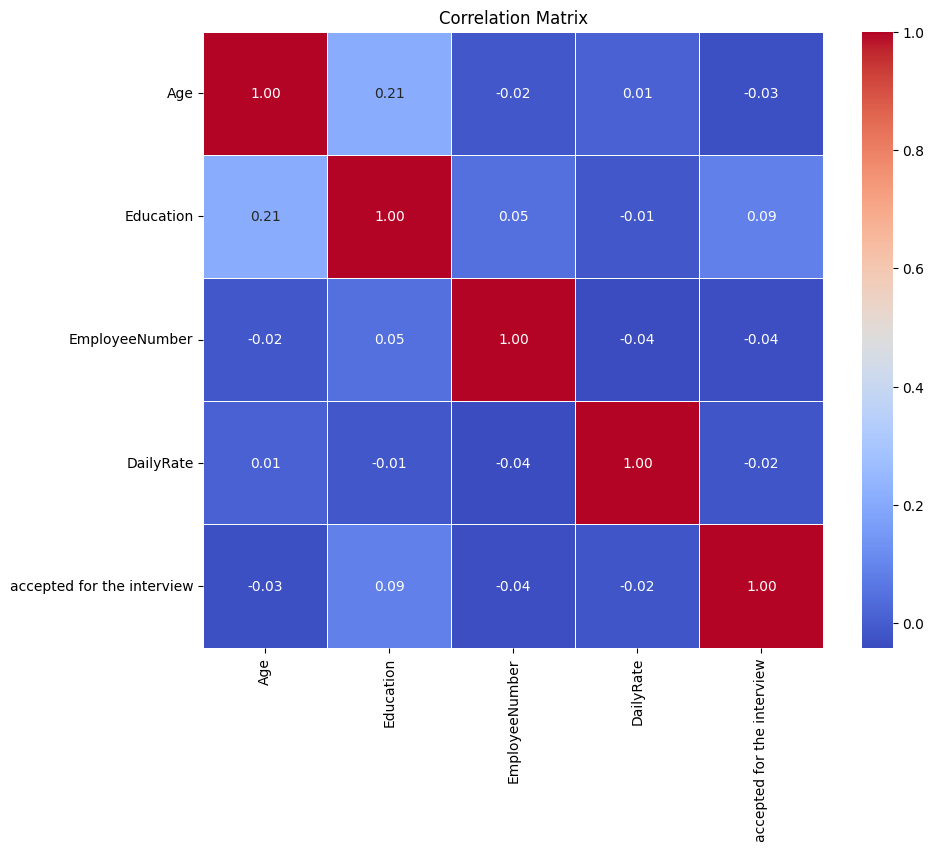

In [5]:
corr_matrix = data.corr()

def plot_correlation_matrix(corr_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(corr_matrix)


Data preprocessing

In [6]:
encoder = OrdinalEncoder()
categorical_columns = ['BusinessTravel', 'MaritalStatus', 'OverTime', 'Gender']
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])



In [7]:
scaler = StandardScaler()
numerical_columns = ['Age', 'Education', 'DailyRate']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [8]:
X = data.drop(['accepted for the interview', 'EmployeeNumber'], axis=1)  # Drop target and identifier
y = data['accepted for the interview']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Here we are running a few models: LogisticRegression, Naive Bayes, and KNN. It's a subject to change, upto the preferences.

In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, predictions),
        'confusion_matrix': confusion_matrix(y_test, predictions)
    }
    

Results

In [10]:
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    

Model: Logistic Regression
Accuracy: 0.9084821428571429
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       402
        True       0.63      0.26      0.37        46

    accuracy                           0.91       448
   macro avg       0.78      0.62      0.66       448
weighted avg       0.89      0.91      0.89       448

Confusion Matrix:
[[395   7]
 [ 34  12]]
Model: Naive Bayes
Accuracy: 0.8839285714285714
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.88      0.93       402
        True       0.47      0.96      0.63        46

    accuracy                           0.88       448
   macro avg       0.73      0.92      0.78       448
weighted avg       0.94      0.88      0.90       448

Confusion Matrix:
[[352  50]
 [  2  44]]
Model: KNN
Accuracy: 0.96875
Classification Report:
              precision    recall  f1-score   support

       